In [839]:
import pandas as pd
import time

In [840]:
df=pd.read_csv("/content/drive/My Drive/Movies_reach.csv")

Data Cleaning

Since there are few time periods which are more than 24:00:00,converting them to actual time.

In [841]:
df.replace('25:30:00','01:30:00',inplace=True)
df.replace('24:30:00','00:30:00',inplace=True)
df.replace('25:00:00','01:00:00',inplace=True)
df.replace('26:00:00','02:00:00',inplace=True)
df.replace('24:00:00','00:00:00',inplace=True)


only keeping required columns.

In [842]:
df2 = df.filter(regex='Reach')
df2=df2.iloc[:,1:]
df2['NST']=df.NST
df2['Weekday']=df['Week Day']


Removing  "," from Reach values.

In [843]:
reach=['Reach_2-14', 'Reach_15-21','Reach_22-30','Reach_31-40','Reach_41-50','Reach_51-60','Reach_61+']
for i in reach:
  df2[i] =df2[i].astype(str).str.replace(',', '')

Converting NST to time stamp variable.

In [844]:
convert={'Reach_2-14': float, 'Reach_15-21': float,'Reach_22-30': float,'Reach_31-40': float,'Reach_41-50': float,'Reach_51-60': float,'Reach_61+': float}
df2=df2.astype(convert)
df2['NST']=pd.to_datetime(df2['NST'],format= '%H:%M:%S', errors='coerce').dt.time 
df2['NST2']=pd.to_datetime(df2['NST'],format= '%H:%M:%S', errors='coerce')


Creating seperate dataframes for weekdays and weekend.

In [845]:
weekend=['Saturday','Sunday']
df_weekend=df2[df2['Weekday'].isin(weekend)]
df_weekday=df2[-df2['Weekday'].isin(weekend)]

Aggregating reach columns w.r.t NST for both weekdays and weekend dataset.

In [846]:
d = dict.fromkeys(('Reach_2-14', 'Reach_15-21','Reach_22-30','Reach_31-40','Reach_41-50','Reach_51-60','Reach_61+'), ['mean'])
res_weekend = df_weekend.groupby('NST').agg(d).reset_index()
res_weekend.columns = ['_'.join(col) for col in res_weekend.columns.values]

In [847]:
d = dict.fromkeys(('Reach_2-14', 'Reach_15-21','Reach_22-30','Reach_31-40','Reach_41-50','Reach_51-60','Reach_61+'), ['mean'])
res_weekday = df_weekday.groupby('NST').agg(d).reset_index()
res_weekday.columns = ['_'.join(col) for col in res_weekday.columns.values]


Ploting the reach means w.r.t NST for weekdays data.

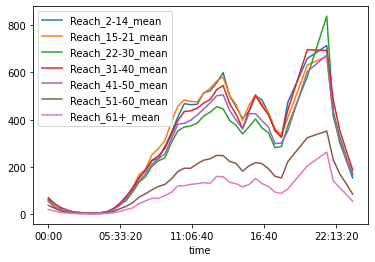

In [848]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
reach=['Reach_2-14_mean', 'Reach_15-21_mean','Reach_22-30_mean','Reach_31-40_mean','Reach_41-50_mean','Reach_51-60_mean','Reach_61+_mean']

plt.locator_params(axis='x',nbins=12)
for i in reach:
  plt.plot('NST_',i,data=res_weekday)
  plt.legend()
plt.show()

So in weekdays we can see three major peaks of reach, one is around 12'o clock morning,another 4'o clock in afternoon and the highest is around 8'o clock night. In morning time generally kids prefer to watch more,afternoon middle age pepole and at night mostly youth.

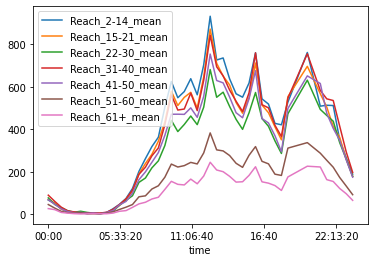

In [849]:
plt.locator_params(axis='x',nbins=12)
for i in reach:
  plt.plot('NST_',i,data=res_weekend)
  plt.legend()
plt.show()

In weekends trends are different from weekdays.Kids mostly watch in the mornings and middle age peole starts watching mostly in afternoon.Though peaks are more or less at similar time but highest peak shifts to 12'o clock morning.

Now let's try to bin the NST into buckets-

In [850]:
date_con=df2[['NST','NST2']]
date_con.rename(columns = {'NST':'NST_'}, inplace = True)
res_weekend=res_weekend.merge(date_con,on='NST_')
res_weekday=res_weekday.merge(date_con,on='NST_')
res_weekend['time_bin'] = pd.cut(x=res_weekend['NST2'].dt.hour, bins=[0,3,6,9,12,15,18,21,24],right=False)
res_weekday['time_bin'] = pd.cut(x=res_weekday['NST2'].dt.hour, bins=[0,3,6,9,12,15,18,21,24],right=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [851]:
d = dict.fromkeys(('Reach_2-14_mean', 'Reach_15-21_mean','Reach_22-30_mean','Reach_31-40_mean','Reach_41-50_mean','Reach_51-60_mean','Reach_61+_mean'), ['mean'])
res_weekend_bin = res_weekend.groupby('time_bin').agg(d).reset_index()
res_weekday_bin = res_weekday.groupby('time_bin').agg(d).reset_index()

In [852]:
res_weekday_bin.to_csv('Timestamp_analysis_weekday.csv')
res_weekend_bin.to_csv('Timestamp_analysis_weekend.csv')

Cluster Analysis

In [853]:
cluster_df=pd.read_csv("/content/drive/My Drive/Movies_rating.csv")

Keeping the rating columns for clustering purpose

In [854]:
cluster_df2 = cluster_df.filter(regex='Rating')
cluster_df2=cluster_df2.iloc[:,1:]
cluster_df2['Movie']=cluster_df.Description

Data cleaning

In [855]:
rating=['Rating_2-14', 'Rating_15-21','Rating_22-30','Rating_31-40','Rating_41-50','Rating_51-60','Rating_61+']
for i in rating:
  cluster_df2[i] =cluster_df2[i].astype(str).str.replace(',', '')

convert={'Rating_2-14': float, 'Rating_15-21': float,'Rating_22-30': float,'Rating_31-40': float,'Rating_41-50': float,'Rating_51-60': float,'Rating_61+': float}
cluster_df2=cluster_df2.astype(convert)

In [856]:
rating.insert(0,'Movie')

Taking aggregate mean of ratings w.r.t movies 

In [857]:
d = dict.fromkeys(('Rating_2-14', 'Rating_15-21','Rating_22-30','Rating_31-40','Rating_41-50','Rating_51-60','Rating_61+'), ['mean'])
cluster_base = cluster_df2.groupby('Movie').agg(d).reset_index()
cluster_base.columns = ['_'.join(col) for col in cluster_base.columns.values]
cluster_base.columns=rating

Taking count of each unique movie has been played number of times through out the year.

In [858]:
count_df = cluster_df2.groupby(cluster_df2.Movie).size().reset_index(name='count')
cluster_base=pd.merge(cluster_base,count_df,on='Movie')

Reading the movie description data

In [859]:
movie_df=pd.read_csv("/content/drive/My Drive/movie_details.csv")

In [860]:
movie_df.Genere.value_counts()

Action        264
Comedy         91
Drama          80
Animation      21
Horror         20
Crime          12
Adventure       9
Romance         9
Thriller        6
Biography       6
Musical         5
Devotional      4
Fantasy         4
Family          1
Name: Genere, dtype: int64

Creating age variable, the number of years movie had been released.

In [861]:
movie_df['age']=2019-movie_df['Realease Year']
movie_df=movie_df[['Movie','age']]
cluster_base=pd.merge(cluster_base,movie_df,on='Movie')

Standardizing the columns before kmeans clustering.

In [862]:
rating2=rating[1:]
rating2.append('age')
rating2.append('count')
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cluster_base[rating2]=scaler.fit_transform(cluster_base[rating2].values)

Dropping if any missing values

In [863]:
cluster_base=cluster_base.dropna()

Separating outliers

In [864]:
data_wo_outlier=cluster_base.copy()
import numpy as np

for i in rating2:
  column=i
  data_wo_outlier=data_wo_outlier[(data_wo_outlier[column]<=np.percentile(data_wo_outlier[column],99))]

data_outlier=cluster_base[~cluster_base.index.isin(data_wo_outlier.index)]

Running kmeans with different number of clusters

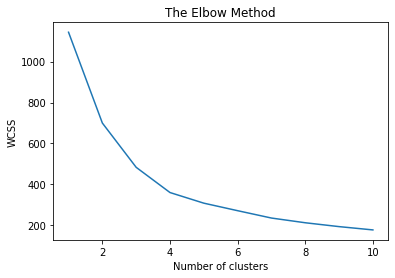

In [865]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_wo_outlier[rating2])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So 4 cluster solution looks optimum.Now let's check F-stat or CH score.

In [866]:
from sklearn import metrics
ch_score=[]
for i in range(3, 10):
  kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state = 42)
  label = kmeans.fit_predict(data_wo_outlier[rating2])
  ch_score.append(metrics.calinski_harabasz_score(data_wo_outlier[rating2],kmeans.labels_))
ch_score

[325.6246495738157,
 345.2874401721313,
 322.0692190231178,
 304.90747905430374,
 304.43826901119445,
 296.0879026937176,
 289.6131311429789]

4 cluster model is giving maximum CH score.So we are finalizing 4 cluster solution.

In [867]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', random_state = 42)
label = kmeans.fit_predict(data_wo_outlier[rating2])
data_wo_outlier['label']=label

In [868]:
ol_label=kmeans.predict(data_outlier[rating2])
data_outlier['label']=ol_label


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [869]:
final_df=data_wo_outlier.append(data_outlier)
final_df.to_csv("Segment_output_release_dt.csv")
final_df.groupby(final_df.label).mean()

,Rating_2-14,Rating_15-21,Rating_22-30,Rating_31-40,Rating_41-50,Rating_51-60,Rating_61+,count,age
label,,,,,,,,,
0,0.553917,0.665377,0.735733,0.644109,0.647444,0.781796,0.744860,-0.177752,-0.607251
1,-0.265836,-0.330375,-0.349901,-0.314513,-0.314823,-0.371553,-0.357501,-0.370232,1.518137
2,0.356908,0.486071,0.549577,0.444621,0.468000,0.623554,0.522135,2.162942,-0.287354
3,-0.288330,-0.357527,-0.408169,-0.341623,-0.350686,-0.446823,-0.404303,-0.400283,-0.334820


Let's visualize the clustering solution.

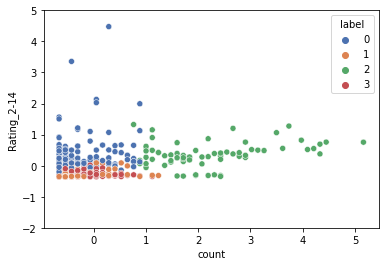

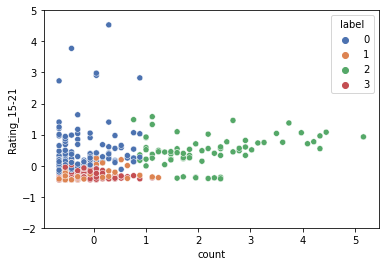

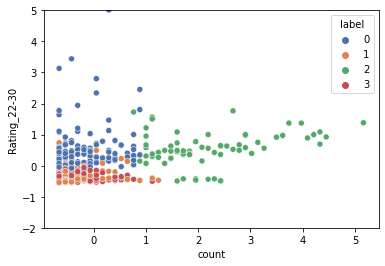

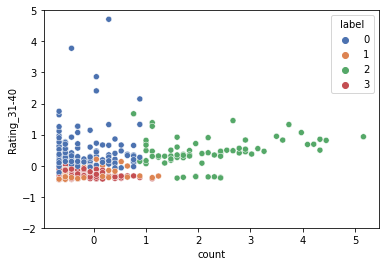

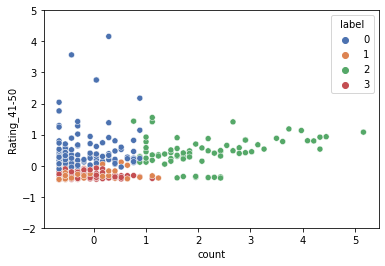

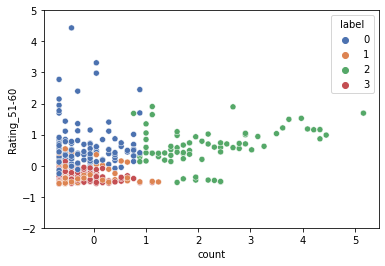

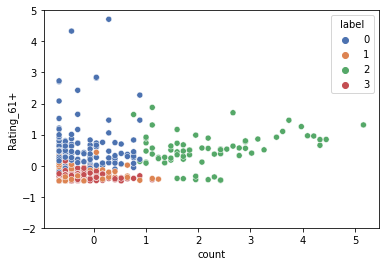

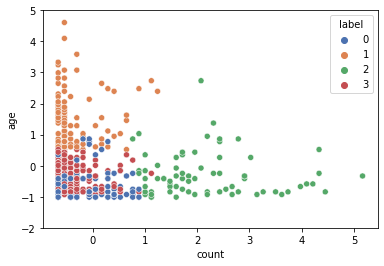

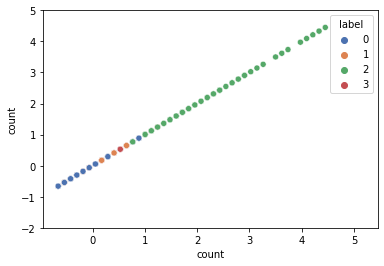

In [870]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in rating2:
  plt.figure()
  xyplot=sns.scatterplot(x='count', y=i,hue='label', data=final_df,palette='deep')
  xyplot.set(ylim=(-2,5))


Conclusion-
From the plots and the summary results we can clearly segregate our movies into 4 different segments. Label 1 & 3 are with low ratings, among that label 1 are old and label 3 are comparatively new.Label 0 & 2 are with good rating,label 0 are less frequently played and label 2 are with high frequency. 

Relabeling

In [871]:
mapping={0:'less frq hit movies',1:'old flop movies',2:'high freq hit movies',3:'new flop movies'}
final_df['segment']=final_df.label.map(mapping)

In [872]:
final_df.to_csv("Movie_segment.csv")

Recomendation Engine

Lets load the input configuration file

In [873]:
import yaml
with open("/content/drive/My Drive/config.yaml") as f:
  config_file=yaml.load(f)

We have done our clustering on basis of ratings and timestamp analysis on basis of reach data. Final recomendation will be done on TSV data.

In [874]:
tsv=pd.read_csv("/content/drive/My Drive/Movies_TSV.csv")

Similar Data cleaning operation

In [875]:
tsv.replace('25:30:00','01:30:00',inplace=True)
tsv.replace('24:30:00','00:30:00',inplace=True)
tsv.replace('25:00:00','01:00:00',inplace=True)
tsv.replace('26:00:00','02:00:00',inplace=True)
tsv.replace('24:00:00','00:00:00',inplace=True)
tsv['NST2']=pd.to_datetime(tsv['NST'],format= '%H:%M:%S', errors='coerce')
tsv['time_bin'] = pd.cut(x=tsv['NST2'].dt.hour, bins=[0,3,6,9,12,15,18,21,24],right=False)

In [876]:
TSV=['TSV_2-14', 'TSV_15-21','TSV_22-30','TSV_31-40','TSV_41-50','TSV_51-60','TSV_61+']
for i in TSV:
  tsv[i] =tsv[i].astype(str).str.replace(',', '')

In [877]:
tsv.replace('n.a',0,inplace=True)
convert={'TSV_2-14': float, 'TSV_15-21': float,'TSV_22-30': float,'TSV_31-40': float,'TSV_41-50': float,'TSV_51-60': float,'TSV_61+': float}
tsv=tsv.astype(convert)
tsv['datetime']=tsv['Week Day']+tsv['time_bin'].astype(str)

In [878]:
tsv2=tsv[['datetime','Description','TSV_2-14', 'TSV_15-21','TSV_22-30','TSV_31-40','TSV_41-50','TSV_51-60','TSV_61+']]

In [879]:
tsv2.columns=['datetime','Movie','TSV_2-14', 'TSV_15-21','TSV_22-30','TSV_31-40','TSV_41-50','TSV_51-60','TSV_61+']

Merging TSV data with segmentation output

In [880]:
seg_data=final_df[['Movie','segment']]
recomend_df1=tsv2.merge(seg_data,on='Movie')

creating avg tsv column

In [881]:
x=recomend_df1.filter(regex='TSV')
x['avg_tsv']=x.mean(axis=1)
recomend_df1['avg_tsv']=x.avg_tsv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating a crosstab data of Day-Time & segments based on avg TSV.

In [882]:
recomend_df2=pd.crosstab(index=recomend_df1.datetime,columns=recomend_df1.segment,values=recomend_df1.avg_tsv,aggfunc=np.mean).reset_index()

Scaler transform of avg tsv based on segments.

In [883]:
labels=['high freq hit movies',	'less frq hit movies'	,'new flop movies',	'old flop movies']
for i in labels:
  mean_val=recomend_df2[i].mean()
  recomend_df2[i].fillna(value=mean_val,inplace=True)
recomend_df2[labels]=scaler.fit_transform(recomend_df2[labels].values)

converting time input to input bin

In [884]:
import time

def convert(time_string):
    date_var = time.strptime(time_string, '%H:%M:%S')

    return date_var

my_time = convert(config_file['Time'])

time_input=tsv.time_bin.unique().astype(str)[my_time.tm_hour//3]

In [885]:
day=config_file['Day'] 
daytime=day+time_input


Final Recomendation

In [886]:
recomend_df2[labels].idxmax(axis=1).value_counts()

new flop movies         16
old flop movies         16
high freq hit movies    15
less frq hit movies      9
dtype: int64

In [887]:
final_df.segment.value_counts()

new flop movies         222
less frq hit movies     124
old flop movies         112
high freq hit movies     71
Name: segment, dtype: int64

We have converted 24 hours into 8 bins,In a week we have 7 days so total 56 slots are available for movies, among that 16 each for new & old flop moviesm15 for high freq hit movies & 9 for less freq hit movies.Though our recomendation is unbiased still I believe we should put additional weight to the less frequent hit movies and should penalize old flop movies.

Lets consider the bias to be 0.25

In [888]:
recomend_df2['less frq hit movies']=recomend_df2['less frq hit movies']*1.25
recomend_df2['old flop movies']=recomend_df2['old flop movies']*0.25

In [889]:
recomend_df2[labels].idxmax(axis=1).value_counts()

less frq hit movies     16
old flop movies         14
new flop movies         13
high freq hit movies    13
dtype: int64

So our final recomended segment is-

In [890]:
recomend_df3=recomend_df2[recomend_df2.datetime==daytime]
final_recomendation=recomend_df3[labels].idxmax(axis=1)
final_recomendation

37    old flop movies
dtype: object

3 recomended movies are-

In [891]:
recomend_movie_df=final_df[['Movie','segment']]

recomend_movie_df[recomend_movie_df.segment.isin(final_recomendation)].Movie.sample(n=3)

355       MRITYU SHIKHAR
48     BADE GHAR KI BETI
364     NASEEB (GOVINDA)
Name: Movie, dtype: object